# CLV

  * Using [Lifetimes](https://github.com/CamDavidsonPilon/lifetimes) package to calculate CLV.
  * [Bruce G.S. Hardie](http://www.brucehardie.com/talks.html), London Business School

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('cdnow_customers_summary.csv')

In [3]:
df.head(3)

,ID,frequency,recency,T
0,1,2,30.43,38.86
1,2,1,1.71,38.86
2,3,0,0.00,38.86


In [4]:
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter()
bgf.fit(df['frequency'], df['recency'], df['T'])

<lifetimes.BetaGeoFitter: fitted with 2357 subjects, a: 0.79, alpha: 4.41, b: 2.43, r: 0.24>

In [5]:
t = 1
df['predicted_purchases'] = df.apply(lambda r: bgf.conditional_expected_number_of_purchases_up_to_time(t, r['frequency'], r['recency'], r['T']), axis=1)
df.sort_values(by=['predicted_purchases']).tail(5)

,ID,frequency,recency,T,predicted_purchases
508,509,18,35.14,35.86,0.424876
840,841,19,34.00,34.14,0.474737
1980,1981,17,28.43,28.86,0.486525
156,157,29,37.71,38.00,0.662395
1515,1516,26,30.86,31.00,0.710622


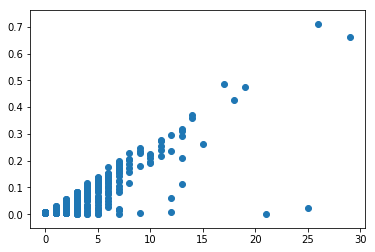

In [6]:
plt.scatter(df['frequency'], df['predicted_purchases'])
plt.show()

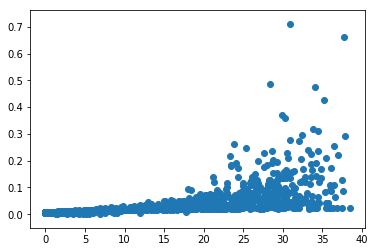

In [7]:
plt.scatter(df['recency'], df['predicted_purchases'])
plt.show()